# Exercises

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # seabon for more visualizations! 
import numpy as np
from scipy import stats

np.random.seed(123)

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [4]:
### MADELEINE 
λ = 2 # The one hour window is contextual through our understanding
cars_dist = stats.poisson(λ)

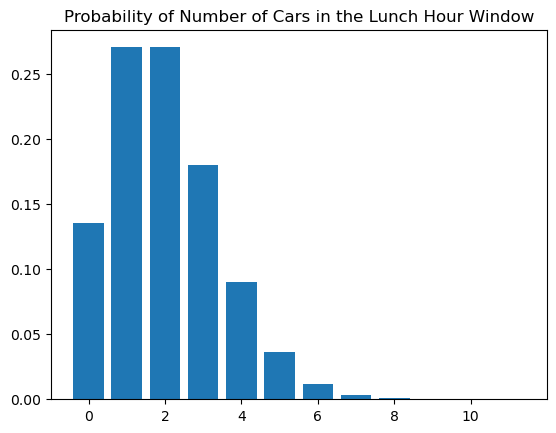

In [5]:
# how to make a chart?
# make a domain? 0-11
# make a range? PMF: the probability of any given instance happening
xs = range(12)
ys = [cars_dist.pmf(x) for x in xs]
plt.bar(xs, ys)
plt.title('Probability of Number of Cars in the Lunch Hour Window')
plt.show()

In [6]:
# I have my dist set up and I want to answer:
# probability of zero cars showing up in the noon hour?
# what can I use to figure this out?
# looking for an EXACT value, PMF!
cars_dist.pmf(0)

0.1353352832366127

In [7]:
# what about zero or less?
cars_dist.cdf(0)

0.1353352832366127

In [8]:
# what about the possibility of every thing minus the possibility of 1 or more?
1 - cars_dist.sf(0)

0.1353352832366127

In [27]:
### MINE
μ = 2
cars_range = np.arange(0, 11)
cars_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
probabilities = stats.poisson.pmf(cars_range, μ)
probabilities

array([1.35335283e-01, 2.70670566e-01, 2.70670566e-01, 1.80447044e-01,
       9.02235222e-02, 3.60894089e-02, 1.20298030e-02, 3.43708656e-03,
       8.59271640e-04, 1.90949253e-04, 3.81898506e-05])

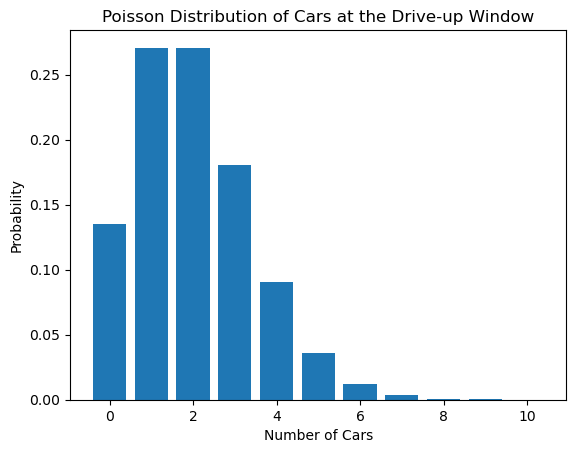

In [13]:
plt.bar(cars_range, probabilities)
plt.title('Poisson Distribution of Cars at the Drive-up Window')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.show()

* What is the probability that no cars drive up in the noon hour?

In [39]:
stats.poisson.pmf(0, μ)

0.1353352832366127

* What is the probability that 3 or more cars come through the drive through?

In [29]:
stats.poisson.sf(2, μ)

0.32332358381693654

* How likely is it that the drive through gets at least 1 car?

In [37]:
prob_at_least_1_car = 1 - stats.poisson.pmf(0, μ)
prob_at_least_1_car

0.8646647167633873

In [41]:
stats.poisson.sf(0, μ)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [37]:
### MADELEINE notes:

# one thing at a time:
# make the distribution
μ = 3.0
σ = 0.3
grades_dist = stats.norm(μ, σ)

* What grade point average is required to be in the top 5% of the graduating class?

In [40]:
# top 5% -> cound from right side and use inverse survival
round(grades_dist.isf(0.05), 2)

3.49

In [41]:
grades_dist.ppf(0.95) #same answer but from different sides!

3.4934560880854417

* What GPA constitutes the bottom 15% of the class?

In [43]:
round(grades_dist.isf(0.85), 2)

2.69

In [45]:
grades_dist.ppf(0.15)

2.689069983151863

* An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

1st decile: 0-10 percentile

2nd decile: 10-20 percentile

3rd decile: 20-30 percentile

In [47]:
grades_dist.ppf(0.2)

2.7475136299281258

In [48]:
grades_dist.ppf(0.3)

2.842679846187588

In [49]:
lower_fence, upper_fence = grades_dist.ppf([0.2,0.3])

In [51]:
lower_fence, upper_fence

(2.7475136299281258, 2.842679846187588)

In [52]:
candidate_grade = 2.8

In [53]:
lower_fence < candidate_grade < upper_fence

True

* If I have a GPA of 3.5, what percentile am I in?

In [56]:
round(grades_dist.cdf(3.5), 2) # from the left side

0.95

In [57]:
round(grades_dist.sf(3.5), 2) # from the right side,
# we are in the top ~4.7% of our class

0.05

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [58]:
# what type of distribution? 
# click-through rate: 
# rate of success: 0.02
# trials: 4326
# 97 or more clickthroughs: survival function!

clicks_dist = stats.binom(4326, 0.02)
# under this distribution, my odds of getting 97 or more clickthroughs
round(clicks_dist.sf(96), 2)

0.14

In [ ]:
#about 14 % chance of that happening

In [ ]:
# if we thought about this in terms of a poisson, we could:
# lambda: probability of success over that specific window
# lambda = 0.02 * 4326

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

* What is the probability that at least one of your first 60 answers is correct?

In [60]:
# 100 questions on the homework, answers are all probabilities to the 100th place.
# question: prob that we get at least one out of first 60 correct.

prob_success = 1 /101
num_trials = 60
homework_dist = stats.binom(num_trials, prob_success)
# survival for any amount over zero:
homework_dist.sf(0)

0.44955038406224

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [63]:
# set-up:
# success rate: 3%
# number of trials: how many trials: 0.9 * 3 * 22
prob_success = 0.03
num_trials = int(0.9 * 3 * 22) # no partial people allowed at codeup
num_trials

59

In [64]:
cleaning_dist = stats.binom(num_trials, prob_success)

In [65]:
round(cleaning_dist.sf(0), 2) #

0.83

In [43]:
# (0.9 * 3 * 22) * 2 -> 119

In [66]:
# if we want to know two days, lets expand that number of trials
# that hanging decimal was 0.4, so we'll account for that 0.8 by adding one to my doubled integer

stats.binom(((num_trials * 2) +1), prob_success).pmf(0)

0.026658541032798935

In [67]:
.17 * .17

0.028900000000000006

In [72]:
# all week?
# new_trial number:
num_trials = round((0.9 * 3 * 22) * 5, 0)
cleaning_dist = stats.binom(num_trials, prob_success)
cleaning_dist.pmf(0)

0.00011781621791054943

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [73]:
# avg number of people in line is 15
# standard deviation of 3
# two minutes for each person to order
# 10 minutes from ordering to getting food,
# negligible commute time
# what are the odds that we have 15 minutes left to eat?

In [74]:
# convert people into minutes of time they take from lunch hour:
# we want to know how much time we have, so let's think about those people in terms of time
μ = 15 * 2
σ = 3 * 2

In [76]:
line_dist = stats.norm(μ, σ)

In [78]:
# time for lunch:
# it'll take *me* two minutes to order just like everyone else
# I need 15 minutes to eat as well
# ten minutes to get my order

60 - (15 + 10 + 2) # lunch hour minues eat time, minus order time, minus wait time for food to arrive

33

In [84]:
# ...
line_dist.cdf(33)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [44]:
from env import user, password, host
import pandas as pd

In [90]:
# we want to connect to the db, and make a request
# my query:
# 
query = '''
SELECT * FROM salaries s WHERE s.to_date > NOW()
'''

connection = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
    
# try reading that into pandas:
df = pd.read_sql(query, connection)
df.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [91]:
# let's rip out the std and mean from the salries here:
sal_stats = df.salary.agg(['mean', 'std'])

In [93]:
sal_stats.values

array([72012.23585731, 17309.99538025])

In [95]:
# we can use the star to unpack positional args from an iterable in the right order
# ** will unpack kwargs from a dictionary

salary_dist = stats.norm(*sal_stats.values)
salary_dist

##### a. What percent of employees earn less than 60,000?

In [97]:
round(salary_dist.cdf(60_000), 2)

0.24

##### b. What percent of employees earn more than 95,000?

In [98]:
round(salary_dist.sf(95_000), 2)

0.09

##### c. What percent of employees earn between 65,000 and 80,000?

In [102]:
# cumulative probability of the higher salary,
# cumulative probability of the lower salary
# get the difference, get the range between the two in terms of percentage.

high_sal, lower_sal = salary_dist.cdf([80_000, 65_000])
salary_bracket = high_sal - lower_sal

In [103]:
round(salary_bracket, 2)

0.34

##### d. What do the top 5% of employees make?

In [105]:
# top 5%?
# 0.05 from the top
# have a prob, looking for a value:
# inverse survival
salary_dist.isf(0.05)

100484.64454102777

In [45]:
salary_dist.ppf(0.95)

NameError: name 'salary_dist' is not defined

**Hint** If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your `.gitignore`, your `env.py`, and to use `pd.read_sql`. Copy over your `.gitignore` and `env.py` from your data science libraries exercises folder, and connect to the employees database like so:

In [86]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
pd.read_sql('SELECT * FROM departments', url)

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing
5,d004,Production
6,d006,Quality Management
7,d008,Research
8,d007,Sales
